# YouTube Data Analysis Project

## پیش پردازش

### 1

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2

In [129]:
category = pd.read_csv("category_ids.csv")
YouTube_data = pd.read_csv("US_youtube_trending_data.csv")
YouTube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16798 entries, 0 to 16797
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           16798 non-null  object
 1   title              16798 non-null  object
 2   publishedAt        16798 non-null  object
 3   channelId          16798 non-null  object
 4   channelTitle       16798 non-null  object
 5   categoryId         16798 non-null  int64 
 6   trending_date      16798 non-null  object
 7   tags               16798 non-null  object
 8   view_count         16798 non-null  int64 
 9   likes              16798 non-null  int64 
 10  dislikes           16798 non-null  int64 
 11  comment_count      16798 non-null  int64 
 12  thumbnail_link     16798 non-null  object
 13  comments_disabled  16798 non-null  bool  
 14  ratings_disabled   16798 non-null  bool  
 15  description        16707 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

### 3

In [130]:
YouTube_data.drop('video_id',inplace=True,axis=1)
YouTube_data.drop('channelId',inplace=True,axis=1)
YouTube_data.drop('thumbnail_link',inplace=True,axis=1)
YouTube_data.drop('comments_disabled',inplace=True,axis=1)
YouTube_data.drop('ratings_disabled',inplace=True,axis=1)
YouTube_data.drop('description',inplace=True,axis=1)
YouTube_data.drop('tags',inplace=True,axis=1)
display(YouTube_data)

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,1514614,156908,5855,35313
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,2381688,146739,2794,16549
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,2038853,353787,2628,40221
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,496771,23251,1856,7647
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,1123889,45802,964,2196
...,...,...,...,...,...,...,...,...,...
16793,Quando Rondo - Way Up [Official Music Video],2020-10-28T17:00:11Z,Quando Rondo,10,2020-11-04T00:00:00Z,351316,20974,339,1237
16794,Bryant Myers - Se Fuerte,2020-10-29T22:00:10Z,BryantMyersVEVO,10,2020-11-04T00:00:00Z,2526049,116939,1923,6081
16795,Civil TV: King Von Welcome to My Neighborhood:...,2020-10-27T22:54:10Z,Karen Civil,24,2020-11-04T00:00:00Z,951521,24267,903,3327
16796,LARRY WHEELS vs SCHOOLBOY LEFT-HANDED AND RIGH...,2020-10-28T19:45:09Z,Larry Wheels,17,2020-11-04T00:00:00Z,1396497,54119,977,12181


### 4

In [131]:
YouTube_data.publishedAt = pd.to_datetime(YouTube_data.publishedAt)
YouTube_data['date_published'] = [d.date() for d in YouTube_data['publishedAt']]
YouTube_data['time_published'] = [d.time() for d in YouTube_data['publishedAt']]
YouTube_data.trending_date = pd.to_datetime(YouTube_data.trending_date)
YouTube_data['date_trending'] = [d.date() for d in YouTube_data['trending_date']]
YouTube_data['time_trending'] = [d.time() for d in YouTube_data['trending_date']]
display(YouTube_data)

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,date_published,time_published,date_trending,time_trending
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,Brawadis,22,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,2020-08-11,19:20:14,2020-08-12,00:00:00
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,Apex Legends,20,2020-08-12 00:00:00+00:00,2381688,146739,2794,16549,2020-08-11,17:00:10,2020-08-12,00:00:00
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,jacksepticeye,24,2020-08-12 00:00:00+00:00,2038853,353787,2628,40221,2020-08-11,16:34:06,2020-08-12,00:00:00
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,XXL,10,2020-08-12 00:00:00+00:00,496771,23251,1856,7647,2020-08-11,16:38:55,2020-08-12,00:00:00
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,Mr. Kate,26,2020-08-12 00:00:00+00:00,1123889,45802,964,2196,2020-08-11,15:10:05,2020-08-12,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,Quando Rondo - Way Up [Official Music Video],2020-10-28 17:00:11+00:00,Quando Rondo,10,2020-11-04 00:00:00+00:00,351316,20974,339,1237,2020-10-28,17:00:11,2020-11-04,00:00:00
16794,Bryant Myers - Se Fuerte,2020-10-29 22:00:10+00:00,BryantMyersVEVO,10,2020-11-04 00:00:00+00:00,2526049,116939,1923,6081,2020-10-29,22:00:10,2020-11-04,00:00:00
16795,Civil TV: King Von Welcome to My Neighborhood:...,2020-10-27 22:54:10+00:00,Karen Civil,24,2020-11-04 00:00:00+00:00,951521,24267,903,3327,2020-10-27,22:54:10,2020-11-04,00:00:00
16796,LARRY WHEELS vs SCHOOLBOY LEFT-HANDED AND RIGH...,2020-10-28 19:45:09+00:00,Larry Wheels,17,2020-11-04 00:00:00+00:00,1396497,54119,977,12181,2020-10-28,19:45:09,2020-11-04,00:00:00


### 5

In [132]:
month_name = {8:'Aug',9:'Sept',10:'Oct',11:'Nov'}
YouTube_data['month_trending'] = pd.DatetimeIndex(YouTube_data.date_trending).month
YouTube_data.month_trending.replace(month_name,inplace=True)
YouTube_data['month_published'] = pd.DatetimeIndex(YouTube_data.date_published).month
YouTube_data.month_published.replace(month_name,inplace=True)
display(YouTube_data)

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,date_published,time_published,date_trending,time_trending,month_trending,month_published
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,Brawadis,22,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,2020-08-11,19:20:14,2020-08-12,00:00:00,Aug,Aug
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,Apex Legends,20,2020-08-12 00:00:00+00:00,2381688,146739,2794,16549,2020-08-11,17:00:10,2020-08-12,00:00:00,Aug,Aug
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,jacksepticeye,24,2020-08-12 00:00:00+00:00,2038853,353787,2628,40221,2020-08-11,16:34:06,2020-08-12,00:00:00,Aug,Aug
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,XXL,10,2020-08-12 00:00:00+00:00,496771,23251,1856,7647,2020-08-11,16:38:55,2020-08-12,00:00:00,Aug,Aug
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,Mr. Kate,26,2020-08-12 00:00:00+00:00,1123889,45802,964,2196,2020-08-11,15:10:05,2020-08-12,00:00:00,Aug,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,Quando Rondo - Way Up [Official Music Video],2020-10-28 17:00:11+00:00,Quando Rondo,10,2020-11-04 00:00:00+00:00,351316,20974,339,1237,2020-10-28,17:00:11,2020-11-04,00:00:00,Nov,Oct
16794,Bryant Myers - Se Fuerte,2020-10-29 22:00:10+00:00,BryantMyersVEVO,10,2020-11-04 00:00:00+00:00,2526049,116939,1923,6081,2020-10-29,22:00:10,2020-11-04,00:00:00,Nov,Oct
16795,Civil TV: King Von Welcome to My Neighborhood:...,2020-10-27 22:54:10+00:00,Karen Civil,24,2020-11-04 00:00:00+00:00,951521,24267,903,3327,2020-10-27,22:54:10,2020-11-04,00:00:00,Nov,Oct
16796,LARRY WHEELS vs SCHOOLBOY LEFT-HANDED AND RIGH...,2020-10-28 19:45:09+00:00,Larry Wheels,17,2020-11-04 00:00:00+00:00,1396497,54119,977,12181,2020-10-28,19:45:09,2020-11-04,00:00:00,Nov,Oct


### 6

In [133]:
YouTube_data['lag'] = YouTube_data.trending_date - YouTube_data.publishedAt
display(YouTube_data)

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,Brawadis,22,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,2020-08-11,19:20:14,2020-08-12,00:00:00,Aug,Aug,0 days 04:39:46
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,Apex Legends,20,2020-08-12 00:00:00+00:00,2381688,146739,2794,16549,2020-08-11,17:00:10,2020-08-12,00:00:00,Aug,Aug,0 days 06:59:50
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,jacksepticeye,24,2020-08-12 00:00:00+00:00,2038853,353787,2628,40221,2020-08-11,16:34:06,2020-08-12,00:00:00,Aug,Aug,0 days 07:25:54
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,XXL,10,2020-08-12 00:00:00+00:00,496771,23251,1856,7647,2020-08-11,16:38:55,2020-08-12,00:00:00,Aug,Aug,0 days 07:21:05
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,Mr. Kate,26,2020-08-12 00:00:00+00:00,1123889,45802,964,2196,2020-08-11,15:10:05,2020-08-12,00:00:00,Aug,Aug,0 days 08:49:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,Quando Rondo - Way Up [Official Music Video],2020-10-28 17:00:11+00:00,Quando Rondo,10,2020-11-04 00:00:00+00:00,351316,20974,339,1237,2020-10-28,17:00:11,2020-11-04,00:00:00,Nov,Oct,6 days 06:59:49
16794,Bryant Myers - Se Fuerte,2020-10-29 22:00:10+00:00,BryantMyersVEVO,10,2020-11-04 00:00:00+00:00,2526049,116939,1923,6081,2020-10-29,22:00:10,2020-11-04,00:00:00,Nov,Oct,5 days 01:59:50
16795,Civil TV: King Von Welcome to My Neighborhood:...,2020-10-27 22:54:10+00:00,Karen Civil,24,2020-11-04 00:00:00+00:00,951521,24267,903,3327,2020-10-27,22:54:10,2020-11-04,00:00:00,Nov,Oct,7 days 01:05:50
16796,LARRY WHEELS vs SCHOOLBOY LEFT-HANDED AND RIGH...,2020-10-28 19:45:09+00:00,Larry Wheels,17,2020-11-04 00:00:00+00:00,1396497,54119,977,12181,2020-10-28,19:45:09,2020-11-04,00:00:00,Nov,Oct,6 days 04:14:51


### 7

In [134]:
YouTube_data['categoryId'] = YouTube_data['categoryId'].map(category.set_index('categoryId')['category'])
display(YouTube_data)

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,Brawadis,People & Blogs,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,2020-08-11,19:20:14,2020-08-12,00:00:00,Aug,Aug,0 days 04:39:46
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,Apex Legends,Gaming,2020-08-12 00:00:00+00:00,2381688,146739,2794,16549,2020-08-11,17:00:10,2020-08-12,00:00:00,Aug,Aug,0 days 06:59:50
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,jacksepticeye,Entertainment,2020-08-12 00:00:00+00:00,2038853,353787,2628,40221,2020-08-11,16:34:06,2020-08-12,00:00:00,Aug,Aug,0 days 07:25:54
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,XXL,Music,2020-08-12 00:00:00+00:00,496771,23251,1856,7647,2020-08-11,16:38:55,2020-08-12,00:00:00,Aug,Aug,0 days 07:21:05
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,Mr. Kate,Howto & Style,2020-08-12 00:00:00+00:00,1123889,45802,964,2196,2020-08-11,15:10:05,2020-08-12,00:00:00,Aug,Aug,0 days 08:49:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,Quando Rondo - Way Up [Official Music Video],2020-10-28 17:00:11+00:00,Quando Rondo,Music,2020-11-04 00:00:00+00:00,351316,20974,339,1237,2020-10-28,17:00:11,2020-11-04,00:00:00,Nov,Oct,6 days 06:59:49
16794,Bryant Myers - Se Fuerte,2020-10-29 22:00:10+00:00,BryantMyersVEVO,Music,2020-11-04 00:00:00+00:00,2526049,116939,1923,6081,2020-10-29,22:00:10,2020-11-04,00:00:00,Nov,Oct,5 days 01:59:50
16795,Civil TV: King Von Welcome to My Neighborhood:...,2020-10-27 22:54:10+00:00,Karen Civil,Entertainment,2020-11-04 00:00:00+00:00,951521,24267,903,3327,2020-10-27,22:54:10,2020-11-04,00:00:00,Nov,Oct,7 days 01:05:50
16796,LARRY WHEELS vs SCHOOLBOY LEFT-HANDED AND RIGH...,2020-10-28 19:45:09+00:00,Larry Wheels,Sports,2020-11-04 00:00:00+00:00,1396497,54119,977,12181,2020-10-28,19:45:09,2020-11-04,00:00:00,Nov,Oct,6 days 04:14:51


### 8

In [135]:
YouTube_data.rename(columns = {'channelTitle':'channel', 'categoryId':'category', 'view_count':'views', 'comment_count':'comments'}, inplace = True)
display(YouTube_data)

,title,publishedAt,channel,category,trending_date,views,likes,dislikes,comments,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,Brawadis,People & Blogs,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,2020-08-11,19:20:14,2020-08-12,00:00:00,Aug,Aug,0 days 04:39:46
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,Apex Legends,Gaming,2020-08-12 00:00:00+00:00,2381688,146739,2794,16549,2020-08-11,17:00:10,2020-08-12,00:00:00,Aug,Aug,0 days 06:59:50
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,jacksepticeye,Entertainment,2020-08-12 00:00:00+00:00,2038853,353787,2628,40221,2020-08-11,16:34:06,2020-08-12,00:00:00,Aug,Aug,0 days 07:25:54
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,XXL,Music,2020-08-12 00:00:00+00:00,496771,23251,1856,7647,2020-08-11,16:38:55,2020-08-12,00:00:00,Aug,Aug,0 days 07:21:05
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,Mr. Kate,Howto & Style,2020-08-12 00:00:00+00:00,1123889,45802,964,2196,2020-08-11,15:10:05,2020-08-12,00:00:00,Aug,Aug,0 days 08:49:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,Quando Rondo - Way Up [Official Music Video],2020-10-28 17:00:11+00:00,Quando Rondo,Music,2020-11-04 00:00:00+00:00,351316,20974,339,1237,2020-10-28,17:00:11,2020-11-04,00:00:00,Nov,Oct,6 days 06:59:49
16794,Bryant Myers - Se Fuerte,2020-10-29 22:00:10+00:00,BryantMyersVEVO,Music,2020-11-04 00:00:00+00:00,2526049,116939,1923,6081,2020-10-29,22:00:10,2020-11-04,00:00:00,Nov,Oct,5 days 01:59:50
16795,Civil TV: King Von Welcome to My Neighborhood:...,2020-10-27 22:54:10+00:00,Karen Civil,Entertainment,2020-11-04 00:00:00+00:00,951521,24267,903,3327,2020-10-27,22:54:10,2020-11-04,00:00:00,Nov,Oct,7 days 01:05:50
16796,LARRY WHEELS vs SCHOOLBOY LEFT-HANDED AND RIGH...,2020-10-28 19:45:09+00:00,Larry Wheels,Sports,2020-11-04 00:00:00+00:00,1396497,54119,977,12181,2020-10-28,19:45:09,2020-11-04,00:00:00,Nov,Oct,6 days 04:14:51


### 9

In [136]:
YouTube_data = YouTube_data.drop_duplicates(subset='title', keep='first')
display(YouTube_data)

,title,publishedAt,channel,category,trending_date,views,likes,dislikes,comments,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,Brawadis,People & Blogs,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,2020-08-11,19:20:14,2020-08-12,00:00:00,Aug,Aug,0 days 04:39:46
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,Apex Legends,Gaming,2020-08-12 00:00:00+00:00,2381688,146739,2794,16549,2020-08-11,17:00:10,2020-08-12,00:00:00,Aug,Aug,0 days 06:59:50
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,jacksepticeye,Entertainment,2020-08-12 00:00:00+00:00,2038853,353787,2628,40221,2020-08-11,16:34:06,2020-08-12,00:00:00,Aug,Aug,0 days 07:25:54
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,XXL,Music,2020-08-12 00:00:00+00:00,496771,23251,1856,7647,2020-08-11,16:38:55,2020-08-12,00:00:00,Aug,Aug,0 days 07:21:05
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,Mr. Kate,Howto & Style,2020-08-12 00:00:00+00:00,1123889,45802,964,2196,2020-08-11,15:10:05,2020-08-12,00:00:00,Aug,Aug,0 days 08:49:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Mandalorian Season 2 Boba Fett Return Explaine...,2020-11-02 23:05:52+00:00,New Rockstars,Entertainment,2020-11-04 00:00:00+00:00,375644,13077,782,1009,2020-11-02,23:05:52,2020-11-04,00:00:00,Nov,Nov,1 days 00:54:08
16640,WE’RE PREGNANT | PREGNANCY ANNOUNCEMENT!,2020-11-02 21:03:59+00:00,Lizeth Ramirez,Film & Animation,2020-11-04 00:00:00+00:00,154586,14621,230,1786,2020-11-02,21:03:59,2020-11-04,00:00:00,Nov,Nov,1 days 02:56:01
16645,Voting In 2020 Election Reaches Historic Level...,2020-11-03 18:08:52+00:00,TODAY,News & Politics,2020-11-04 00:00:00+00:00,342444,4792,170,1585,2020-11-03,18:08:52,2020-11-04,00:00:00,Nov,Nov,0 days 05:51:08
16649,I made this Epic Cityscape out of TRASH!? Ft. ...,2020-11-02 12:51:10+00:00,Real Terrain Hobbies,Howto & Style,2020-11-04 00:00:00+00:00,118766,13844,77,663,2020-11-02,12:51:10,2020-11-04,00:00:00,Nov,Nov,1 days 11:08:50


## انالیز ، تحلیل و نتیجه گیری

### 10

In [137]:
YouTube_data = YouTube_data.sort_values(["likes"], ascending=False)
display(YouTube_data)

,title,publishedAt,channel,category,trending_date,views,likes,dislikes,comments,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
1800,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,Big Hit Labels,Music,2020-08-21 00:00:00+00:00,57229275,7045907,165420,2314087,2020-08-21,03:58:10,2020-08-21,00:00:00,Aug,Aug,-1 days +20:01:50
3200,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28 04:00:11+00:00,BLACKPINK,Music,2020-08-28 00:00:00+00:00,51234434,5912778,405329,1847794,2020-08-28,04:00:11,2020-08-28,00:00:00,Aug,Aug,-1 days +19:59:49
10201,BLACKPINK – ‘Lovesick Girls’ M/V,2020-10-02 04:00:13+00:00,BLACKPINK,Music,2020-10-02 00:00:00+00:00,39363127,4746270,17513,1021283,2020-10-02,04:00:13,2020-10-02,00:00:00,Oct,Oct,-1 days +19:59:47
2602,BTS (방탄소년단) 'Dynamite' Official MV (B-side),2020-08-24 15:00:01+00:00,Big Hit Labels,Music,2020-08-25 00:00:00+00:00,23493158,4238883,56358,339379,2020-08-24,15:00:01,2020-08-25,00:00:00,Aug,Aug,0 days 08:59:59
1400,BTS (방탄소년단) 'Dynamite' Official Teaser,2020-08-18 15:00:02+00:00,Big Hit Labels,Music,2020-08-19 00:00:00+00:00,31964452,3858943,71828,828929,2020-08-18,15:00:02,2020-08-19,00:00:00,Aug,Aug,0 days 08:59:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8898,Galaxy Unpacked for Every Fan: Livestream,2020-09-23 16:00:54+00:00,Samsung,Science & Technology,2020-09-25 00:00:00+00:00,3756841,0,0,0,2020-09-23,16:00:54,2020-09-25,00:00:00,Sept,Sept,1 days 07:59:06
7613,A message from Tyler.,2020-09-18 12:20:09+00:00,Tyler Childers,Music,2020-09-19 00:00:00+00:00,392202,0,0,0,2020-09-18,12:20:09,2020-09-19,00:00:00,Sept,Sept,0 days 11:39:51
9873,SHUT DOWN PROVO CANYON SCHOOL,2020-09-28 17:28:53+00:00,Paris Hilton,Entertainment,2020-09-30 00:00:00+00:00,409059,0,0,2182,2020-09-28,17:28:53,2020-09-30,00:00:00,Sept,Sept,1 days 06:31:07
4480,Protesters demand Portland mayor's resignation,2020-09-01 14:07:05+00:00,Fox News,News & Politics,2020-09-03 00:00:00+00:00,1047679,0,0,0,2020-09-01,14:07:05,2020-09-03,00:00:00,Sept,Sept,1 days 09:52:55


### 11

In [138]:
Count_Videos = YouTube_data['date_published'].value_counts()
display(Count_Videos)

2020-09-18    61
2020-09-14    61
2020-09-25    56
2020-10-30    55
2020-09-16    55
              ..
2020-08-22    16
2020-11-03    10
2020-08-05     4
2020-11-04     2
2020-08-03     1
Name: date_published, Length: 93, dtype: int64

### 12

4    613
1    557
0    553
2    513
6    469
3    457
5    378
Name: date_published, dtype: int64
This Shows That Most Videos Get Uploaded on Fridays(4)


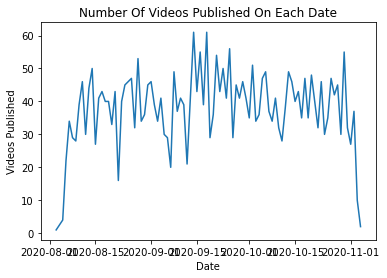

In [139]:
from datetime import datetime
Count_Videos.plot()
plt.xlabel("Date")
plt.ylabel("Videos Published")
plt.title("Number Of Videos Published On Each Date")
weekday = YouTube_data['date_published'].apply(lambda x: datetime.weekday(x))
weekDayCount = weekday.value_counts()
print(weekDayCount)
print('This Shows That Most Videos Get Uploaded on Fridays(4)')

### 13

In [140]:
published = YouTube_data.groupby('month_published').size()
Group_byMonth = pd.DataFrame(published)
Group_byMonth.rename(columns = {0:'Published'}, inplace = True)
trending = YouTube_data.groupby('month_trending').size()
Group_byMonth['Trending'] = trending
views = YouTube_data.groupby('month_published')['views'].sum()
Group_byMonth['Views'] = views
display(Group_byMonth)

,Published,Trending,Views
month_published,,,
Aug,988,943,1455745669
Nov,76,144,84883540
Oct,1239,1217,1735868034
Sept,1237,1236,1462007478


### 14

This Shows That Lag of Most Videos is between 0 and 3 days


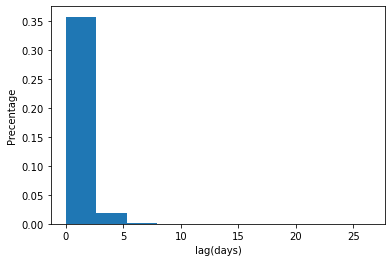

In [141]:
lag_data = YouTube_data['lag']
func = lambda x : x*0 if(x < 0) else x
lag_data = (lag_data / np.timedelta64(1,'D')).astype(float).apply(func)
plt.hist(lag_data,density=True)
plt.xlabel("lag(days)")
plt.ylabel("Precentage")
print('This Shows That Lag of Most Videos is between 0 and 3 days')

### 15

In [142]:
month = input('Enter The Name Of The Month (Aug/Sept/Oct/Nov) : ')
if month in ['Aug','Sept','Oct','Nov']:
    print('The Count Of Videos Published On This Month Is : ')
    print(published[month])
else:
    print('Invalid Name')

Enter The Name Of The Month (Aug/Sept/Oct/Nov) : Nov
The Count Of Videos Published On This Month Is : 
76


### 16

,title,channel,views,month_trending
51,Cardi B - WAP feat. Megan Thee Stallion [Offic...,Cardi B,76805026,Aug
1800,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,57229275,Aug
3200,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,51234434,Aug
1400,BTS (방탄소년단) 'Dynamite' Official Teaser,Big Hit Labels,31964452,Aug
2602,BTS (방탄소년단) 'Dynamite' Official MV (B-side),Big Hit Labels,23493158,Aug
37,"I Spent $1,000,000 On Lottery Tickets and WON",MrBeast,21022916,Aug
159,TREASURE - 'BOY' M/V,TREASURE (트레저),18534845,Aug
800,"Last To Leave $800,000 Island Keeps It",MrBeast,17365719,Aug
401,I Bought A Private Island,MrBeast,16242445,Aug
20,Shark Attack Test- Human Blood vs. Fish Blood,Mark Rober,14684474,Aug


,title,channel,views,month_trending
15999,Doing My Best Friend's Halloween Makeup ft. Ch...,James Charles,11774104,Nov
16001,Baking Halloween Treats with my Best Friends f...,charli d'amelio,6117906,Nov
16002,BEST FRIENDS BUYING EACH OTHER COSTUMES ft. Ja...,LARRAY,5408222,Nov
16008,Carving Pumpkins with my Best Friends ft Charl...,Dixie D'Amelio,5404432,Nov
16199,Spezia 1-4 Juventus | Ronaldo Scores Brace As ...,Serie A,5323957,Nov
16013,"Among Us But PewDiePie Goes 90,000 IQ!",MrBeast Gaming,5115516,Nov
16407,"Whatever You Buy, I'll Pay For!",MrBeast Gaming,4975858,Nov
16205,20 WOMEN VS 1 SIDEMEN,Sidemen,4811606,Nov
16208,LOOK I'VE GOT SOMETHING TO SAY!!!!,Jaiden Animations,3885698,Nov
16004,"BeckSeat Driver ft. Charli, Dixie, James, Larr...",Noah Beck,3885199,Nov


,title,channel,views,month_trending
10201,BLACKPINK – ‘Lovesick Girls’ M/V,BLACKPINK,39363127,Oct
13867,Burjkhalifa | Laxmmi Bomb | Akshay Kumar | Kia...,Zee Music Company,30452631,Oct
12598,Apple Event — October 13,Apple,24125686,Oct
12275,EVERY DAY AMONG US IMPOSTOR LIFE ANIMATION,Hornstromp Games,16594442,Oct
10417,BTS (방탄소년단) 'Savage Love' (Laxed – Siren Beat)...,BANGTANTV,16398436,Oct
15200,Harry Styles - Golden (Official Video),HarryStylesVEVO,16062539,Oct
11637,BLACKPINK - 'Lovesick Girls' DANCE PRACTICE VIDEO,BLACKPINK,14294853,Oct
15598,I Survived 24 Hours Straight In Ice,MrBeast,14028343,Oct
15031,I Uber’d People And Let Them Keep The Car,MrBeast,13960995,Oct
13398,"$300,000 Influencer Trivia Tournament!",MrBeast,13484346,Oct


,title,channel,views,month_trending
8747,Lady Gaga - 911 (Official Music Video),LadyGagaVEVO,19296421,Sept
5230,"Get This Random Person 1,000,000 Subscribers",MrBeast,15768104,Sept
7800,"I Gave My 40,000,000th Subscriber 40 Cars",MrBeast,15137352,Sept
5406,Brawl Stars: Brawl Talk - Welcome to Starr Par...,Brawl Stars,14445277,Sept
8421,Jack | Hoa Hải Đường | Official Music Video,J97,14429622,Sept
5001,"Get Him 1,000,000 Subscribers in 24 Hours",MrBeast,12035592,Sept
7400,Why I Haven’t Been Uploading,MrBeast,11695048,Sept
9207,"Would You Rather Have A Giant Diamond or $100,...",MrBeast,11354353,Sept
4202,Zendikar Rising Official Trailer – Magic: The ...,Magic: The Gathering,11256073,Sept
7001,Apple Event — September 15,Apple,10915777,Sept


Text(0, 0.5, 'views(*100000000)')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48169 missing from c

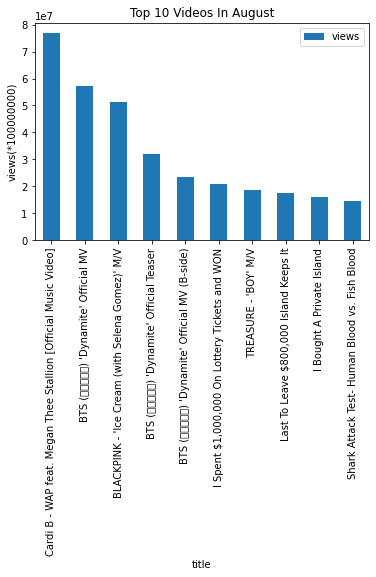

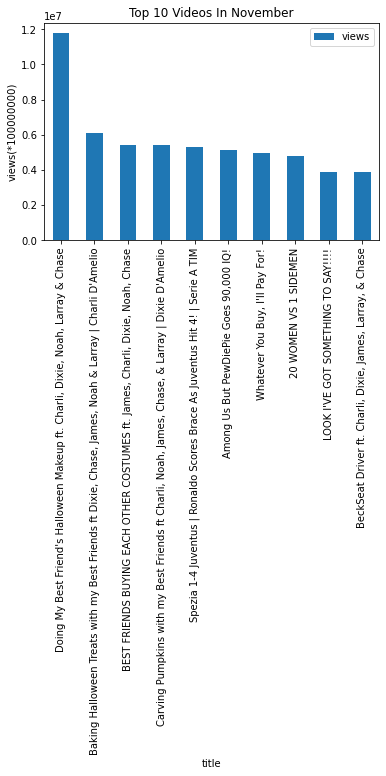

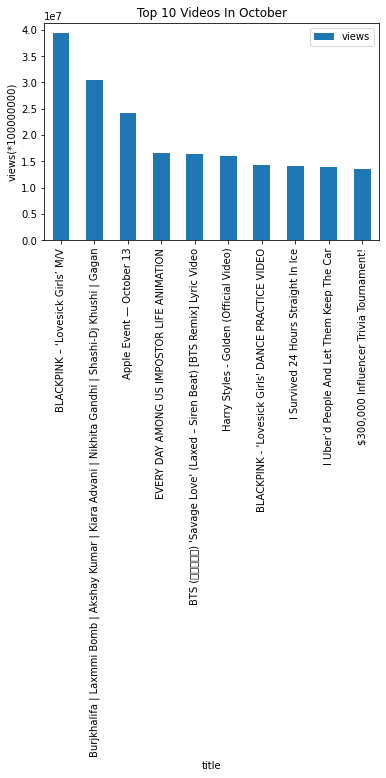

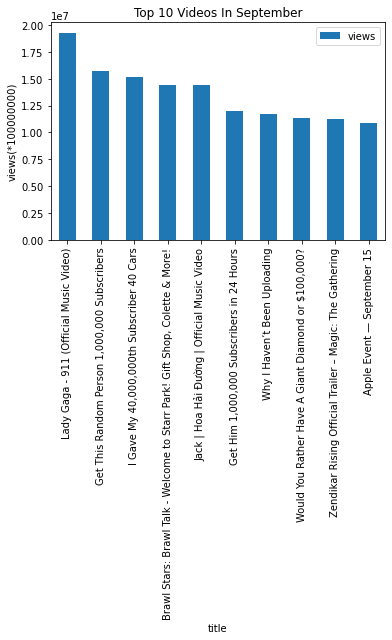

In [143]:
channels = YouTube_data[['title','channel','views','month_trending']]
channels = channels.groupby('month_trending')
Aug_Top = channels.get_group('Aug').sort_values(["views"], ascending=False).head(10)
Nov_Top = channels.get_group('Nov').sort_values(["views"], ascending=False).head(10)
Oct_Top = channels.get_group('Oct').sort_values(["views"], ascending=False).head(10)
Sept_Top = channels.get_group('Sept').sort_values(["views"], ascending=False).head(10)
display(Aug_Top)
display(Nov_Top)
display(Oct_Top)
display(Sept_Top)
Aug_Top.plot(x ='title', y='views', kind = 'bar')
plt.title("Top 10 Videos In August")
plt.ylabel("views(*100000000)")
Nov_Top.plot(x ='title', y='views', kind = 'bar')
plt.title("Top 10 Videos In November")
plt.ylabel("views(*100000000)")
Oct_Top.plot(x ='title', y='views', kind = 'bar')
plt.title("Top 10 Videos In October")
plt.ylabel("views(*100000000)")
Sept_Top.plot(x ='title', y='views', kind = 'bar')
plt.title("Top 10 Videos In September")
plt.ylabel("views(*100000000)")

### 17

In [144]:
new_category=YouTube_data.groupby(['category']).agg(
    sum_likes=pd.NamedAgg(column='likes', aggfunc='sum'),
    sum_dislikes=pd.NamedAgg(column='dislikes', aggfunc='sum'),
    count=pd.NamedAgg(column='category', aggfunc='count')
).reset_index()
new_category['total_opinions']= new_category.sum_likes + new_category.sum_dislikes
new_category['%like']=(new_category.sum_likes / new_category.total_opinions) * 100
new_category['%dislike']=(new_category.sum_dislikes / new_category.total_opinions) * 100
display(new_category)

,category,sum_likes,sum_dislikes,count,total_opinions,%like,%dislike
0,Autos & Vehicles,2690151,35494,64,2725645,98.697776,1.302224
1,Comedy,21223879,185739,211,21409618,99.132451,0.867549
2,Education,4598979,73482,82,4672461,98.427338,1.572662
3,Entertainment,75892510,1182896,655,77075406,98.465274,1.534726
4,Film & Animation,8840688,133174,123,8973862,98.515979,1.484021
5,Gaming,34832291,838494,311,35670785,97.649354,2.350646
6,Howto & Style,7833598,209918,149,8043516,97.390221,2.609779
7,Music,162883104,3056306,798,165939410,98.158180,1.841820
8,News & Politics,2357393,318359,153,2675752,88.102074,11.897926
9,Nonprofits & Activism,123931,1650,5,125581,98.686107,1.313893


### 18

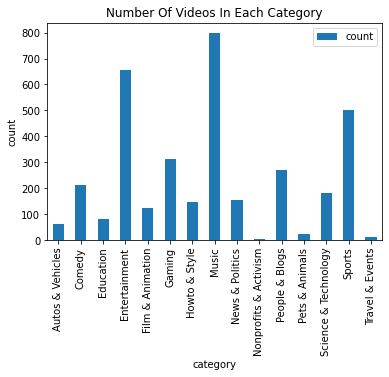

In [145]:
ax = new_category.plot.bar(x='category', y='count')
plt.title("Number Of Videos In Each Category")
plt.xlabel("category")
plt.ylabel("count")
plt.show()

### 19

Text(0.5, 1.0, 'Views On 11/01/2020')

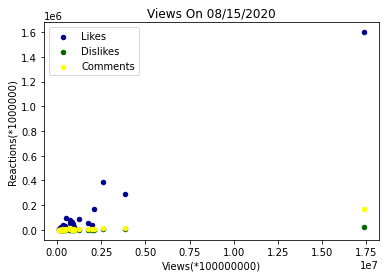

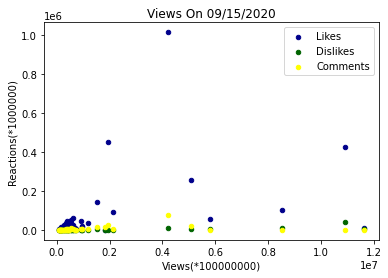

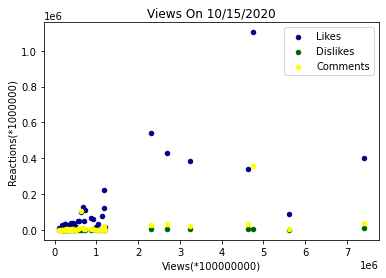

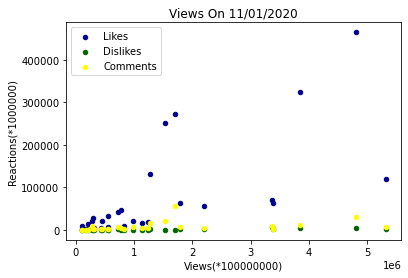

In [146]:
Date_df1 = YouTube_data.loc[YouTube_data["publishedAt"].between("2020-08-15", "2020-08-16")]
Date_df2 = YouTube_data.loc[YouTube_data["publishedAt"].between("2020-09-15", "2020-09-16")]
Date_df3 = YouTube_data.loc[YouTube_data["publishedAt"].between("2020-10-15", "2020-10-16")]
Date_df4 = YouTube_data.loc[YouTube_data["publishedAt"].between("2020-11-01", "2020-11-02")]

Date_df1_ax1 = Date_df1.plot.scatter(x="views", y="likes", color="DarkBlue", label="Likes")
Date_df1_ax2 = Date_df1.plot.scatter(x="views", y="dislikes", color="DarkGreen", label="Dislikes", ax=Date_df1_ax1);
Date_df1_ax3 = Date_df1.plot.scatter(x="views", y="comments", color="Yellow", label="Comments", ax=Date_df1_ax1, xlabel="Views(*100000000)", ylabel="Reactions(*1000000)")
plt.title("Views On 08/15/2020")

Date_df2_ax1 = Date_df2.plot.scatter(x="views", y="likes", color="DarkBlue", label="Likes")
Date_df2_ax2 = Date_df2.plot.scatter(x="views", y="dislikes", color="DarkGreen", label="Dislikes", ax=Date_df2_ax1);
Date_df2_ax3 = Date_df2.plot.scatter(x="views", y="comments", color="Yellow", label="Comments", ax=Date_df2_ax1, xlabel="Views(*100000000)", ylabel="Reactions(*1000000)")
plt.title("Views On 09/15/2020")

Date_df3_ax1 = Date_df3.plot.scatter(x="views", y="likes", color="DarkBlue", label="Likes")
Date_df3_ax2 = Date_df3.plot.scatter(x="views", y="dislikes", color="DarkGreen", label="Dislikes", ax=Date_df3_ax1);
Date_df3_ax3 = Date_df3.plot.scatter(x="views", y="comments", color="Yellow", label="Comments", ax=Date_df3_ax1, xlabel="Views(*100000000)", ylabel="Reactions(*1000000)")
plt.title("Views On 10/15/2020")

Date_df4_ax1 = Date_df4.plot.scatter(x="views", y="likes", color="DarkBlue", label="Likes")
Date_df4_ax2 = Date_df4.plot.scatter(x="views", y="dislikes", color="DarkGreen", label="Dislikes", ax=Date_df4_ax1);
Date_df4_ax3 = Date_df4.plot.scatter(x="views", y="comments", color="Yellow", label="Comments", ax=Date_df4_ax1, xlabel="Views(*100000000)", ylabel="Reactions(*1000000)")
plt.title("Views On 11/01/2020")

### 20

Text(0.5, 1.0, 'Reactions Based On Views Of Top 100 Videos')

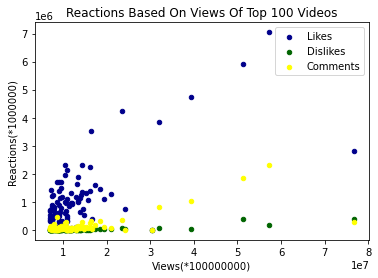

In [147]:
temp=YouTube_data.sort_values(by='views',ascending=False)
Top100=temp.head(100)
Top100_ax1 = Top100.plot.scatter(x="views", y="likes", color="DarkBlue", label="Likes")
Top100_ax2 = Top100.plot.scatter(x="views", y="dislikes", color="DarkGreen", label="Dislikes", ax=Top100_ax1);
Top100_ax3 = Top100.plot.scatter(x="views", y="comments", color="Yellow", label="Comments", ax=Top100_ax1, xlabel="Views(*100000000)", ylabel="Reactions(*1000000)")
plt.title("Reactions Based On Views Of Top 100 Videos")

### 21

Text(0.5, 1.0, 'News & Politics')

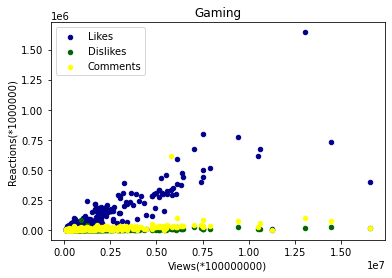

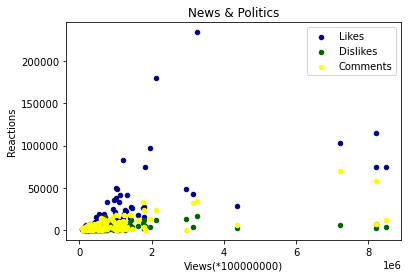

In [148]:
GB_Category=YouTube_data.groupby(['category'])
Gaming=GB_Category.get_group('Gaming')
Gaming_ax1 = Gaming.plot.scatter(x="views", y="likes", color="DarkBlue", label="Likes")
Gaming_ax2 = Gaming.plot.scatter(x="views", y="dislikes", color="DarkGreen", label="Dislikes", ax=Gaming_ax1);
Gaming_ax3 = Gaming.plot.scatter(x="views", y="comments", color="Yellow", label="Comments", ax=Gaming_ax1, xlabel="Views(*100000000)", ylabel="Reactions(*1000000)")
plt.title('Gaming')

News=GB_Category.get_group('News & Politics')
News_ax1 = News.plot.scatter(x="views", y="likes", color="DarkBlue", label="Likes")
News_ax2 = News.plot.scatter(x="views", y="dislikes", color="DarkGreen", label="Dislikes", ax=News_ax1);
News_ax3 = News.plot.scatter(x="views", y="comments", color="Yellow", label="Comments", ax=News_ax1, xlabel="Views(*100000000)", ylabel="Reactions")
plt.title('News & Politics')

### 22

Text(0.5, 1.0, 'Reactions To Videos About Trump In Each Month')

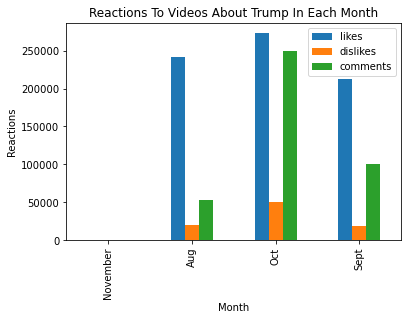

In [149]:
Trump=YouTube_data.loc[YouTube_data['title'].str.contains("trump", case=False)]
x=Trump.groupby(['month_published']).agg(
    likes=pd.NamedAgg(column='likes', aggfunc='sum'),
    dislikes=pd.NamedAgg(column='dislikes', aggfunc='sum'),
    comments=pd.NamedAgg(column='comments', aggfunc='sum')
).reset_index()
November_row=pd.DataFrame({'month_published':'November' , 'likes':0 , 'dislikes':0 , 'comments':0}, index=[0])
x=pd.concat([November_row,x]).reset_index(drop=True)
x=x.set_index('month_published')
x.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Reactions")
plt.title("Reactions To Videos About Trump In Each Month")

### 23

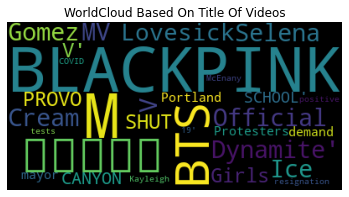

In [150]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(str(YouTube_data['title'].values))
plt.imshow(wordcloud)
plt.title('WorldCloud Based On Title Of Videos')
plt.axis("off")
plt.show()

# Nima Shadman - Iraj Gharaei - Asma GhafooriFar